<a href="https://colab.research.google.com/github/psahai10/AIFellowship/blob/main/Uplift_Employee_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/davinwijaya/why-you-should-start-using-uplift-modeling

## Employee Turnover: 
1. Predict the outcome of an employee leaving: Employee Turnover Prediction (ETP)
2. Predict which employee should we target to make him stay: Employee Uplift Modeling (ETU)

## Target Classes:
1. Control Non–responders (CN): Employees who have not been treated with the retention program and left. We want to find the persuadables in this group.
2. Control Responders (CR): Employees who have not been treated with the retention program and stay. We want to avoid targeting this group because we do not need to treat them to make them stay, and there is a possibility that some of them are Do-Not-Disturbs.
3. Treated Non–Responders (TN): Employees who have been treated with the retention program but left. We want to avoid treating this group because they will leave if treated, and there is a possibility that some of them are Do-Not-Disturbs that will stay if left untreated.
4. Treated Responders (TR): Employees who have been treated with the retention program and stayed. We also want to find the persuadables in this group.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/My Drive/Uplift_modelling_datasets/HR_comma_sep.csv')
df2 = pd.read_csv('/content/drive/My Drive/Uplift_modelling_datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df3 = pd.read_csv('/content/drive/My Drive/Uplift_modelling_datasets/turnover.csv', encoding='latin-1')

In [ ]:
df3.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [ ]:
# Import the packages and libraries needed for this project
import matplotlib as mpl, matplotlib.pyplot as plt, \
pandas as pd, seaborn as sns, xgboost as xgb, sklearn as sk
from sklearn.metrics import accuracy_score, \
confusion_matrix, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Checking for package version
print("Matplotlib Version", mpl.__version__)
print("Pandas Version", pd.__version__)
print("Xgboost Version", xgb.__version__)
print("Seaborn Version", sns.__version__)
print("Sci-kit learn Version", sk.__version__)

Matplotlib Version 3.2.2
Pandas Version 1.1.5
Xgboost Version 0.90
Seaborn Version 0.11.1
Sci-kit learn Version 0.22.2.post1


In [ ]:
df_model_1 = df1.copy()
df_model_2 = df2.copy()
df_model_3 = df3.copy()

In [ ]:
def explore_data(df):
    bold = '\033[1m'
    end = '\033[0m' 
    print(str())
    print(bold+'DataFrame Head:'+end)
    display(df.head())
    print(bold+'DataFrame Shape:'+end)
    display(df.shape)
    print(bold+'DataFrame Data Types:'+end)
    display(df.dtypes)
    print(bold+'DataFrame Null Values:'+end)
    display(np.sum(df.isnull()))
    print(bold+'DataFrame Summary Stats:'+end)
    display(df.describe())
    print("-------------------------------")

In [ ]:
explore_data(df_model_1)


DataFrame Head:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


DataFrame Shape:


(14999, 10)

DataFrame Data Types:


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

DataFrame Null Values:


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

DataFrame Summary Stats:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


-------------------------------


In [ ]:
explore_data(df_model_2)


DataFrame Head:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


DataFrame Shape:


(1470, 35)

DataFrame Data Types:


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

DataFrame Null Values:


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

DataFrame Summary Stats:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


-------------------------------


In [ ]:
explore_data(df_model_3)


DataFrame Head:


,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


DataFrame Shape:


(1129, 16)

DataFrame Data Types:


stag            float64
event             int64
gender           object
age             float64
industry         object
profession       object
traffic          object
coach            object
head_gender      object
greywage         object
way              object
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
dtype: object

DataFrame Null Values:


stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

DataFrame Summary Stats:


,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.627526,0.505757,31.066965,5.592383,5.478034,5.597254,5.665633,5.879628
std,34.096597,0.500188,6.996147,1.851637,1.703312,1.980101,1.709176,1.904016
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.728953,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.344969,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.318275,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


-------------------------------


In [ ]:
# Declare unwanted features (i.e. columns) that will be dropped.
# Features with no predictive value
drop_2 = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
# drop the features.
df_model_2 = df_model_2.drop(drop_2,axis=1)

In [ ]:
# Rename all target features.
# This is the predicitve variable y: Did the employee left or not?
df_model_1 = df_model_1.rename(columns={'left': 'churn'})
df_model_2 = df_model_2.rename(columns={'Attrition': 'churn'})
df_model_3 = df_model_3.rename(columns={'event': 'churn'})

In [ ]:
# Rename all treatment features.
# Treatment: Given this treatment, did the employee stayed or left?
df_model_1 = df_model_1.rename(columns={'promotion_last_5years': 'treatment'})
df_model_2 = df_model_2.rename(columns={'OverTime': 'treatment'})
df_model_3 = df_model_3.rename(columns={'coach': 'treatment'})

In [ ]:
# Declare features for label encoding.
string1, string2, string3 = ['salary'], ['churn',
                                         'treatment',
                                         'BusinessTravel'], ['treatment']
# Explore the unique data for label encoding
print('✔️Dataset 1:')
for col in string1:
    print(col, df_model_1[col].unique())

print('\n✔️Dataset 2:')
for col in string2:
    print(col, df_model_2[col].unique())
    
print('\n✔️Dataset 3:')
for col in string3:
    print(col, df_model_3[col].unique())

✔️Dataset 1:
salary ['low' 'medium' 'high']

✔️Dataset 2:
churn ['Yes' 'No']
treatment ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

✔️Dataset 3:
treatment ['no' 'yes' 'my head']


In [ ]:
# Manually label encode the target (i.e. dependent variable) for dataset 1
df_model_1.salary = df_model_1.salary.map({'low': 0, 'medium': 1, 'high':2})

In [ ]:
# Manually label encode the target and identified treatment (i.e. employee retention program) for dataset 2
df_model_2.churn = df_model_2.churn.map({'Yes': 1, 'No': 0})
df_model_2.treatment = df_model_2.treatment.map({'Yes': 0, 'No': 1})
# Declaration BusinessTravel
df_model_2.BusinessTravel = df_model_2.BusinessTravel.map({'Non-Travel': 0,
                                                           'Travel_Rarely': 1,
                                                           'Travel_Frequently':2})

In [ ]:
# Manually label encode the target and treatment for dataset 3
df_model_3.treatment = df_model_3.treatment.map({'yes': 0, 'no': 1, 'my head':2})
df_model_3 = df_model_3.loc[df_model_3.treatment <=1].reset_index(drop=True)

In [ ]:
# One-Hot Encoding:
df_model_1, df_model_inverse_1 = pd.get_dummies(df_model_1), pd.get_dummies(df_model_1)
df_model_2, df_model_inverse_2 = pd.get_dummies(df_model_2), pd.get_dummies(df_model_2)
df_model_3, df_model_inverse_3 = pd.get_dummies(df_model_3), pd.get_dummies(df_model_3)

In [ ]:
df_model_1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,treatment,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,target_class
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_model_2.head()

,Age,churn,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,treatment,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,target_class
0,41,1,1,1102,1,2,2,94,3,2,4,5993,19479,8,0,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,49,0,2,279,8,1,3,61,2,2,2,5130,24907,1,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,3
2,37,1,1,1373,2,2,4,92,2,1,3,2090,2396,6,0,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
3,33,0,2,1392,3,4,4,56,3,1,3,2909,23159,1,0,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,27,0,1,591,2,1,1,40,3,1,2,3468,16632,9,1,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,3


In [ ]:
df_model_3.head()

,stag,churn,age,treatment,extraversion,independ,selfcontrol,anxiety,novator,gender_f,gender_m,industry_ HoReCa,industry_Agriculture,industry_Banks,industry_Building,industry_Consult,industry_IT,industry_Mining,industry_Pharma,industry_PowerGeneration,industry_RealEstate,industry_Retail,industry_State,industry_Telecom,industry_etc,industry_manufacture,industry_transport,profession_Accounting,profession_BusinessDevelopment,profession_Commercial,profession_Consult,profession_Engineer,profession_Finanñe,profession_HR,profession_IT,profession_Law,profession_Marketing,profession_PR,profession_Sales,profession_Teaching,profession_etc,profession_manage,traffic_KA,traffic_advert,traffic_empjs,traffic_friends,traffic_rabrecNErab,traffic_recNErab,traffic_referal,traffic_youjs,head_gender_f,head_gender_m,greywage_grey,greywage_white,way_bus,way_car,way_foot,target_class
0,7.030801,1,35.0,1,6.2,4.1,5.7,7.1,8.3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,2
1,22.965092,1,33.0,1,6.2,4.1,5.7,7.1,8.3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,2
2,15.934292,1,35.0,1,6.2,6.2,2.6,4.8,8.3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,2
3,15.934292,1,35.0,1,5.4,7.6,4.9,2.5,6.7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,2
4,8.410678,1,32.0,0,3.0,4.1,8.0,7.1,3.7,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0


In [ ]:
# Is treatment feature positively or negatively correlated with the probability of Churn?
def correlation_treatment(df:pd.DataFrame):
    """Function to calculate the treatment's correlation
    """
    correlation = df[['treatment','churn']].corr(method ='pearson') 
    return(pd.DataFrame(round(correlation.loc['churn'] * 100,2)))

In [ ]:
print("✔️Dataset 1:", correlation_treatment(df_model_1).iloc[0,0])
print("\n✔️Dataset 2:", correlation_treatment(df_model_2).iloc[0,0])
print("\n✔️Dataset 3:", correlation_treatment(df_model_3).iloc[0,0])

✔️Dataset 1: -6.18

✔️Dataset 2: -24.61

✔️Dataset 3: -4.0


## Target Classes:
1. Control Non–responders (CN): Employees who have not been treated with the retention program and left. We want to find the persuadables in this group.
<code>
df['target_class'] = 0 
</code>
2. Control Responders (CR): Employees who have not been treated with the retention program and stay. We want to avoid targeting this group because we do not need to treat them to make them stay, and there is a possibility that some of them are Do-Not-Disturbs. <code> df.loc[(df.treatment == 0) & (df.churn == 0),'target_class'] = 1 </code>
3. Treated Non–Responders (TN): Employees who have been treated with the retention program but left. We want to avoid treating this group because they will leave if treated, and there is a possibility that some of them are Do-Not-Disturbs that will stay if left untreated. <code> df.loc[(df.treatment == 1) & (df.churn == 1),'target_class'] = 2 </code>
4. Treated Responders (TR): Employees who have been treated with the retention program and stayed. We also want to find the persuadables in this group. <code> df.loc[(df.treatment == 1) & (df.churn == 0),'target_class'] = 3  </code>

In [ ]:
def declare_target_class(df:pd.DataFrame):
    """Function for declare the target class
    """
    #CN:
    df['target_class'] = 0 
    #CR:
    df.loc[(df.treatment == 0) & (df.churn == 0),'target_class'] = 1 
    #TN:
    df.loc[(df.treatment == 1) & (df.churn == 1),'target_class'] = 2 
    #TR:
    df.loc[(df.treatment == 1) & (df.churn == 0),'target_class'] = 3 
    return df

In [ ]:
# Add the four target classes
df_model_1, df_model_2, df_model_3 = declare_target_class(df_model_1), \
declare_target_class(df_model_2), declare_target_class(df_model_3)

In [ ]:
def split_data(df_model:pd.DataFrame):
    """Split data into training data and testing data
    """
    X = df_model.drop(['churn','target_class'],axis=1)
    y = df_model.churn
    z = df_model.target_class
    X_train, X_test, \
    y_train, y_test, \
    z_train, z_test = train_test_split(X,
                                       y,
                                       z,
                                       test_size=0.3,
                                       random_state=42,
                                       stratify=df_model['treatment'])
    return X_train,X_test, y_train, y_test, z_train, z_test


def machine_learning(X_train:pd.DataFrame,
                     X_test:pd.DataFrame,
                     y_train:pd.DataFrame,
                     y_test:pd.DataFrame,
                     z_train:pd.DataFrame,
                     z_test:pd.DataFrame):
    """Machine learning process consists of 
    data training, and data testing process (i.e. prediction) with XGBoost (XGB) Algorithm
    """
    # prepare a new DataFrame
    prediction_results = pd.DataFrame(X_test).copy()
    
    # ETP MODEL
    # train the ETP model
    model_tp \
    = xgb.XGBClassifier().fit(X_train.drop('treatment', axis=1), y_train)  
    # prediction Process for ETP model 
    prediction_tp \
    = model_tp.predict(X_test.drop('treatment',axis=1))
    probability__tp \
    = model_tp.predict_proba(X_test.drop('treatment', axis=1))
    prediction_results['prediction_churn'] = prediction_tp
    prediction_results['proba_churn'] = probability__tp[:,1]
    
    # ETU MODEL
    # train the ETU model
    model_etu \
    = xgb.XGBClassifier().fit(X_train.drop('treatment', axis=1), z_train)
    # prediction Process for ETU model 
    prediction_etu \
    = model_etu.predict(X_test.drop('treatment', axis=1))
    probability__etu \
    = model_etu.predict_proba(X_test.drop('treatment', axis=1))
    prediction_results['prediction_target_class'] = prediction_etu
    prediction_results['proba_CN'] = probability__etu[:,0] 
    prediction_results['proba_CR'] = probability__etu[:,1] 
    prediction_results['proba_TN'] = probability__etu[:,2] 
    prediction_results['proba_TR'] = probability__etu[:,3]
    prediction_results['score_etu'] = prediction_results.eval('\
    proba_CN/(proba_CN+proba_CR) \
    + proba_TR/(proba_TN+proba_TR) \
    - proba_TN/(proba_TN+proba_TR) \
    - proba_CR/(proba_CN+proba_CR)')  
    
    # add the churn and target class into dataframe as validation data
    prediction_results['churn'] = y_test
    prediction_results['target_class'] = z_test
    return prediction_results


def predict(df_model:pd.DataFrame):
    """Combining data split and machine learning process with XGB
    """
    X_train, X_test, y_train, y_test, z_train, z_test = split_data(df_model)
    prediction_results = machine_learning(X_train,
                                          X_test,
                                          y_train,
                                          y_test,
                                          z_train,
                                          z_test)
    print("✔️Prediction succeeded")
    return prediction_results

In [ ]:
# Machine Learning Modelling Process
print("Predicting dataset 1 ...")
prediction_results_1 = predict(df_model_1)
print("\nPredicting dataset 2 ...")
prediction_results_2 = predict(df_model_2)
print("\nPredicting dataset 3 ...")
prediction_results_3 = predict(df_model_3)

Predicting dataset 1 ...
✔️Prediction succeeded

Predicting dataset 2 ...
✔️Prediction succeeded

Predicting dataset 3 ...
✔️Prediction succeeded


In [ ]:
def cm_evaluation(df:pd.DataFrame):
    """Confusion matrix evaluation
    """  
    print("===================================")
    print("1. ETP's confusion matrix result:")
    confusion_etp = confusion_matrix(df['churn'], df['prediction_churn'])
    df_confusion_etp = pd.DataFrame(confusion_etp, columns = ['True','False'], index = ['Positive','Negative'])
    print(df_confusion_etp)
    
    print("-----------------------------------")
    
    print("2. ETU's confusion matrix result:")   
    confusion_etu = multilabel_confusion_matrix(df['target_class'], df['prediction_target_class'])
    print("a. CN's confusion matrix:")  
    df_cn = pd.DataFrame(confusion_etu[0], columns = ['True','False'], index = ['Positive','Negative'])
    print(df_cn)
    print("b. CR's confusion matrix:") 
    df_cr = pd.DataFrame(confusion_etu[1], columns = ['True','False'], index = ['Positive','Negative'])
    print(df_cr) 
    print("c. TN's confusion matrix:")
    df_tn = pd.DataFrame(confusion_etu[2], columns = ['True','False'], index = ['Positive','Negative'])
    print(df_tn) 
    print("d. TR's confusion matrix:") 
    df_tr = pd.DataFrame(confusion_etu[3], columns = ['True','False'], index = ['Positive','Negative'])
    print(df_tr)
    
    print("===================================")

In [ ]:
# Confusion Matrix Evaluation
print("✔️Dataset 1")
cm_evaluation(prediction_results_1)
print("\n\n✔️Dataset 2")
cm_evaluation(prediction_results_2)
print("\n\n✔️Dataset 3")
cm_evaluation(prediction_results_3)

✔️Dataset 1
1. ETP's confusion matrix result:
          True  False
Positive  3392     44
Negative    83    981
-----------------------------------
2. ETU's confusion matrix result:
a. CN's confusion matrix:
          True  False
Positive  3390     53
Negative    81    976
b. CR's confusion matrix:
          True  False
Positive   991    162
Negative    49   3298
c. TN's confusion matrix:
          True  False
Positive  4493      0
Negative     7      0
d. TR's confusion matrix:
          True  False
Positive  4408      3
Negative    81      8


✔️Dataset 2
1. ETP's confusion matrix result:
          True  False
Positive   374      4
Negative    52     11
-----------------------------------
2. ETU's confusion matrix result:
a. CN's confusion matrix:
          True  False
Positive   406      6
Negative    29      0
b. CR's confusion matrix:
          True  False
Positive   331     14
Negative    95      1
c. TN's confusion matrix:
          True  False
Positive   406      1
Negative    

In [ ]:
def accuracy_evaluation(df:pd.DataFrame):
    """Accuracy evaluation
    """
    akurasi_cp = accuracy_score(df['churn'],
                                df['prediction_churn'])
    print('✔️ETP model accuracy: %.2f%%' % (akurasi_cp * 100.0))
    
    
    akurasi_uplift = accuracy_score(df['target_class'],
                                    df['prediction_target_class'])
    print('✔️ETU model accuracy: %.2f%%' % (akurasi_uplift * 100.0))

In [ ]:
# Accuracy Evaluation Process.
print("Dataset 1")
accuracy_evaluation(prediction_results_1)
print("\nDataset 2")
accuracy_evaluation(prediction_results_2)
print("\nDataset 3")
accuracy_evaluation(prediction_results_3)

Dataset 1
✔️ETP model accuracy: 97.18%
✔️ETU model accuracy: 95.16%

Dataset 2
✔️ETP model accuracy: 87.30%
✔️ETU model accuracy: 61.22%

Dataset 3
✔️ETP model accuracy: 60.41%
✔️ETU model accuracy: 53.88%


In [ ]:
def sorting_data(df:pd.DataFrame):
    """Function to sort data
    """
    # Set up new DataFrames for ETP model and ETU model
    df_c = pd.DataFrame({'n':[], 'target_class':[]})
    df_u = df_c.copy()
    df_c['target_class'] = df['target_class']
    df_u['target_class'] = df['target_class']
    
    
    # Add quantiles
    df_c['n'] = df.proba_churn.rank(pct=True, ascending=False)
    df_u['n'] = df.score_etu.rank(pct=True, ascending=False)
    df_c['score'] = df['proba_churn']
    df_u['score'] = df['score_etu']
    
    
    # Ranking the data by deciles
    df_c = df_c.sort_values(by='n').reset_index(drop=True)
    df_u = df_u.sort_values(by='n').reset_index(drop=True)
    df_c['model'], df_u['model'] = 'CP', 'Uplift'
    return df_c, df_u


def calculating_qini(df:pd.DataFrame):
    """Function to measure the Qini value
    """
    # Calculate the C, T, CR, and TR
    C, T = sum(df['target_class'] <= 1), sum(df['target_class'] >= 2)
    df['cr'] = 0
    df['tr'] = 0
    df.loc[df.target_class  == 1,'cr'] = 1
    df.loc[df.target_class  == 3,'tr'] = 1
    df['cr/c'] = df.cr.cumsum() / C
    df['tr/t'] = df.tr.cumsum() / T
    

    # Calculate & add the qini value into the Dataframe
    df['uplift'] = df['tr/t'] - df['cr/c']
    df['random'] = df['n'] * df['uplift'].iloc[-1]
    qini_coef= df['uplift'].sum(skipna = True) - df['random'].sum(skipna = True)
    
    # Print the Qini coefficient
    print('✔️Qini coefficient = {} {}'.format(round(qini_coef, 2), '%'))
    
    # Add q0 into the Dataframe
    q0 = pd.DataFrame({'n':0, 'uplift':0, 'target_class': None}, index =[0])
    qini = pd.concat([q0, df]).reset_index(drop = True)
    return qini


def merging_data(df_c:pd.DataFrame, df_u:pd.DataFrame):
    """Function to add the 'Model' column and merge the dataframe into one
    """
    df_u['model'] = 'ETU'
    df_c['model'] = 'ETP'
    df = pd.concat([df_u, df_c]).sort_values(by='n').reset_index(drop = True)
    return df


def plot_qini(df:pd.DataFrame):
    """Function to plot the qini curve
    """
    print('\nPlotting the qini curve...')
    
    # Define the data that will be plotted
    order = ['ETU','ETP']
    ax = sns.lineplot(x='n', y=df.uplift, hue='model', data=df,
                      style='model', palette=['red','deepskyblue'],
                      style_order=order, hue_order = order)
    
    
    # Additional plot display settings
    handles, labels = ax.get_legend_handles_labels()
    plt.xlabel('Proportion targeted',fontsize=30)
    plt.ylabel('Uplift',fontsize=30)
    plt.subplots_adjust(right=1)
    plt.subplots_adjust(top=1)
    plt.legend(fontsize=30)
    ax.tick_params(labelsize=24)
    ax.legend(handles=handles[1:], labels=labels[1:])
    ax.plot([0,1], [0,df.loc[len(df) - 1,'uplift']],'--', color='grey')
    print('✔️Successfully plot the qini curve')
    return ax


def evaluation_qini(prediction_results:pd.DataFrame):
    """Function to combine all qini evaluation processes
    """
    df_c, df_u = sorting_data(prediction_results)
    print('ETP model:')
    qini_c = calculating_qini(df_c)
    print('\nETU model:')
    qini_u = calculating_qini(df_u)
    qini = merging_data(qini_c, qini_u)
    ax = plot_qini(qini)
    return ax, qini

ETP model:
✔️Qini coefficient = -138.07 %

ETU model:
✔️Qini coefficient = 621.87 %

Plotting the qini curve...
✔️Successfully plot the qini curve


Text(0.5, 1.0, 'Qini Curve - Dataset 1')

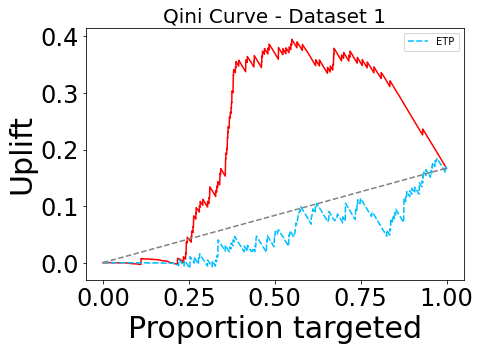

In [ ]:
# Qini evaluation results for DataSet 1 with negative treatment correlation
ax, qini_1 = evaluation_qini(prediction_results_1)
plt.title('Qini Curve - Dataset 1',fontsize=20)


# save into pdf:
# plt.savefig('qini_1_n.pdf', bbox_inches='tight')

ETP model:
✔️Qini coefficient = 31.23 %

ETU model:
✔️Qini coefficient = 23.17 %

Plotting the qini curve...
✔️Successfully plot the qini curve


Text(0.5, 1.0, 'Qini Curve - Dataset 2')

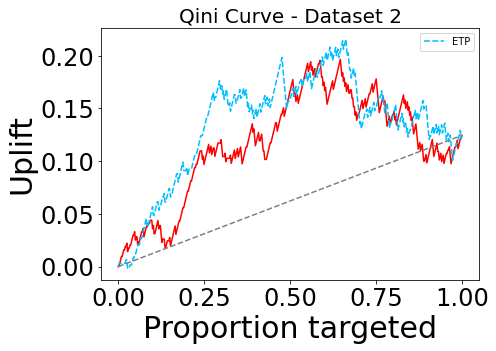

In [ ]:
# Qini evaluation results for DataSet 2 with negative treatment correlation
ax, qini_2 = evaluation_qini(prediction_results_2)
plt.title('Qini Curve - Dataset 2',fontsize=20)


# save into pdf:
# plt.savefig('qini_2_n.pdf', bbox_inches='tight'

ETP model:
✔️Qini coefficient = -10.39 %

ETU model:
✔️Qini coefficient = 6.83 %

Plotting the qini curve...
✔️Successfully plot the qini curve


Text(0.5, 1.0, 'Qini Curve - Dataset 3')

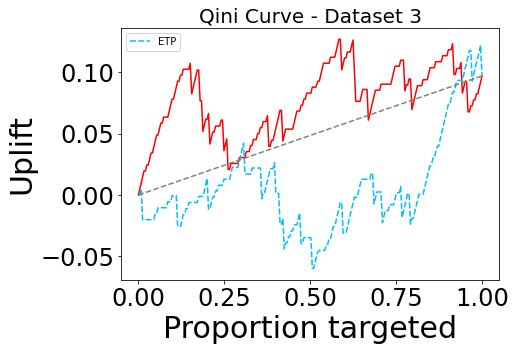

In [ ]:
# Qini evaluation results for DataSet 3 with negative treatment correlation
ax, qini_3 = evaluation_qini(prediction_results_3)
plt.title('Qini Curve - Dataset 3',fontsize=20)


# save into pdf:
# plt.savefig('qini_3_n.pdf', bbox_inches='tight')

In [ ]:
# The process to inverse treatment's parameter
# Thus also inverse the treatment's correlation from negative to positive
df_model_inverse_1.treatment = df_model_inverse_1.treatment.replace({0: 1, 1: 0})
df_model_inverse_2.treatment = df_model_inverse_2.treatment.replace({0: 1, 1: 0})
df_model_inverse_3.treatment = df_model_inverse_3.treatment.replace({0: 1, 1: 0})

In [ ]:
# Recalculate the treatment correlation
display(correlation_treatment(df_model_inverse_1).iloc[0,0])
display(correlation_treatment(df_model_inverse_2).iloc[0,0])
display(correlation_treatment(df_model_inverse_3).iloc[0,0])

6.18

24.61

4.0

In [ ]:
# Add the target class feature to all three datasets
df_model_inverse_1, df_model_inverse_2, df_model_inverse_3 = declare_target_class(df_model_inverse_1), \
declare_target_class(df_model_inverse_2), declare_target_class(df_model_inverse_3)

In [ ]:
# Do the prediction process once more time
prediction_results_inverse_1 = predict(df_model_inverse_1)
prediction_results_inverse_2 = predict(df_model_inverse_2)
prediction_results_inverse_3 = predict(df_model_inverse_3)

✔️Prediction succeeded
✔️Prediction succeeded
✔️Prediction succeeded


ETP model:
✔️Qini coefficient = 286.12 %

ETU model:
✔️Qini coefficient = 577.15 %

Plotting the qini curve...
✔️Successfully plot the qini curve


Text(0.5, 1.0, 'Qini Curve - Dataset 1')

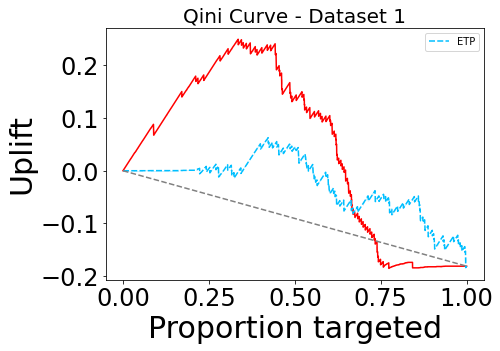

In [ ]:
 #Qini evaluation results for DataSet 1 with positive treatment correlation
ax, qini_inverse_1 = evaluation_qini(prediction_results_inverse_1)
plt.title('Qini Curve - Dataset 1',fontsize=20)


# save into pdf:
# plt.savefig('qini_1_p.pdf', bbox_inches='tight')

ETP model:
✔️Qini coefficient = -32.91 %

ETU model:
✔️Qini coefficient = 14.45 %

Plotting the qini curve...
✔️Successfully plot the qini curve


Text(0.5, 1.0, 'Qini Curve - Dataset 2')

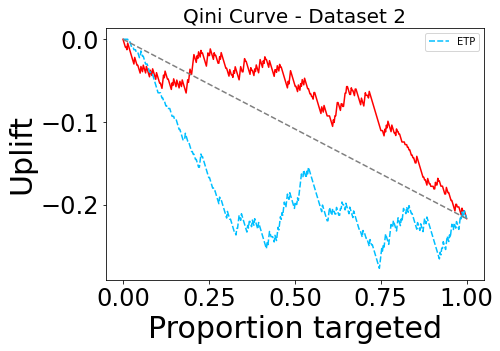

In [ ]:
# qini evaluation results for DataSet 2 with positive treatment correlation
ax, qini_inverse_2 = evaluation_qini(prediction_results_inverse_2)
plt.title('Qini Curve - Dataset 2',fontsize=20)


# save into pdf:
# plt.savefig('qini_2_p.pdf', bbox_inches='tight')

ETP model:
✔️Qini coefficient = 10.47 %

ETU model:
✔️Qini coefficient = 15.66 %

Plotting the qini curve...
✔️Successfully plot the qini curve


Text(0.5, 1.0, 'Qini Curve - Dataset 3')

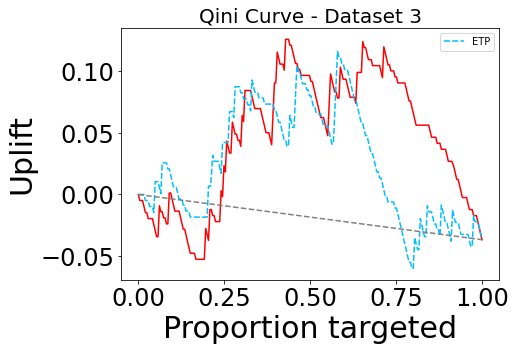

In [ ]:
# Qini evaluation results for DataSet 3 with positive treatment correlation
ax, qini_inverse_3 = evaluation_qini(prediction_results_inverse_3)
plt.title('Qini Curve - Dataset 3',fontsize=20)


# save into pdf:
# plt.savefig('qini_3_p.pdf', bbox_inches='tight')